In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../aesara')
import gefera as gf

In [8]:
t = np.linspace(67.8, 68.8, 1000)
#t2 = t1 + 365
#t = np.hstack((t1, t2))

ap = 1.0
tp = 0.2
ep = 0.2
pp = 365
wp = 0.1 * np.pi / 180
ip = 90.0 * np.pi / 180

am = 0.007
tm = -1.3
em = 0.1
pm = 3
om = 0.1 * np.pi / 180
wm = 90 * np.pi / 180
im = 88.0 * np.pi / 180
mm = 0.01

u1 = 0.5
u2 = 0.3
rp = 0.2
rm = 0.1

In [9]:
star = gf.star(u1, u2)
planet = gf.planet(rp, ap, tp, ep, pp, wp, ip)
moon = gf.moon(rm, am, tm, em, pm, om, wm, im, mm)
system = gf.system(star, planet, moon)
lc = system.light_curve(t)

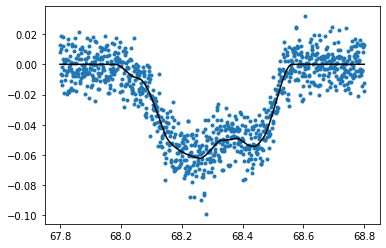

In [11]:
lctrue = lc.eval()
y = lctrue + np.random.randn(len(t)) * 0.01
plt.plot(t, y, '.')
plt.plot(t, lctrue, 'k-')

In [12]:
import pymc as pmc
from aesara import tensor as tt

with pmc.Model() as model:
        
    ap = pmc.Uniform("ap", lower=0.8, upper=1.3, initval=1.0)
    tp = pmc.Uniform("tp", lower=0.1, upper=0.3, initval=0.2)
    pp = pmc.Uniform("pp", lower=355, upper=375, initval=365)
    wp = pmc.Uniform("wp", lower=-0.0001, upper=0.5, initval=0.1 * np.pi / 180)
    ip = pmc.Uniform("ip", lower=88*np.pi/180, upper=90.1*np.pi/180, initval=np.pi/2)
    
    am = pmc.Uniform("am", lower=0.0, upper=0.1, initval=0.007)
    tm = pmc.Uniform("tm", lower=-2.0, upper=0.0, initval=-1.2)
    pm = pmc.Uniform("pm", lower=2.0, upper=4.0, initval=3.0)
    om = pmc.Uniform("om", lower=0.0, upper=0.2, initval=0.1)
    wm = pmc.Uniform("wm", lower=0.0, upper=np.pi, initval=np.pi/2)
    im = pmc.Uniform("im", lower=0.0, upper=np.pi/2, initval=np.pi * 88 / 180)
    mm = pmc.Uniform("mm", lower=0.0, upper=1.0, initval=0.01)
    
    ep = pmc.Uniform("ep", lower=0.0, upper=1.0, initval=0.2)
    em = pmc.Uniform("em", lower=0.0, upper=1.0, initval=0.1)
    
    q1 = pmc.Uniform("q1", lower=0.0, upper=1.0, initval=0.5)
    q2 = pmc.Uniform("q2", lower=0.0, upper=1.0, initval=0.2)
    u1 = 2 * tt.sqrt(q1) * q2
    u2 = tt.sqrt(q1) * (1 - 2 * q2)
    
    rp = pmc.Uniform("rp", lower=0.15, upper=0.5, initval=0.2)
    rm = pmc.Uniform("rm", lower=0.0, upper=0.15, initval=0.1)
    
    lsigma = pmc.Uniform("lsigma", lower=np.log(0.001), upper=np.log(0.1), initval=np.log(0.01))
    
    star = gf.star(u1, u2)
    planet = gf.planet(rp, ap, tp, ep, pp, wp, ip)
    moon = gf.moon(rm, am, tm, em, pm, om, wm, im, mm)
    system = gf.system(star, planet, moon)
    obs = pmc.Normal("obs", mu=system.light_curve(t), sigma=tt.exp(lsigma), observed=y)
    trace = pmc.sample(5000, tune=2000, cores=2, init='adapt_full')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_full...
/usr/local/lib/python3.8/site-packages/pymc/step_methods/hmc/quadpotential.py:611: UserWarning: QuadPotentialFullAdapt is an experimental feature
  warnings.warn("QuadPotentialFullAdapt is an experimental feature")
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ap, tp, pp, wp, ip, am, tm, pm, om, wm, im, mm, ep, em, q1, q2, rp, rm, lsigma]


Sampling 2 chains for 2_000 tune and 5_000 draw iterations (4_000 + 10_000 draws total) took 4739 seconds.
There were 1943 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1802 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


/usr/local/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/pairplot.py:238: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


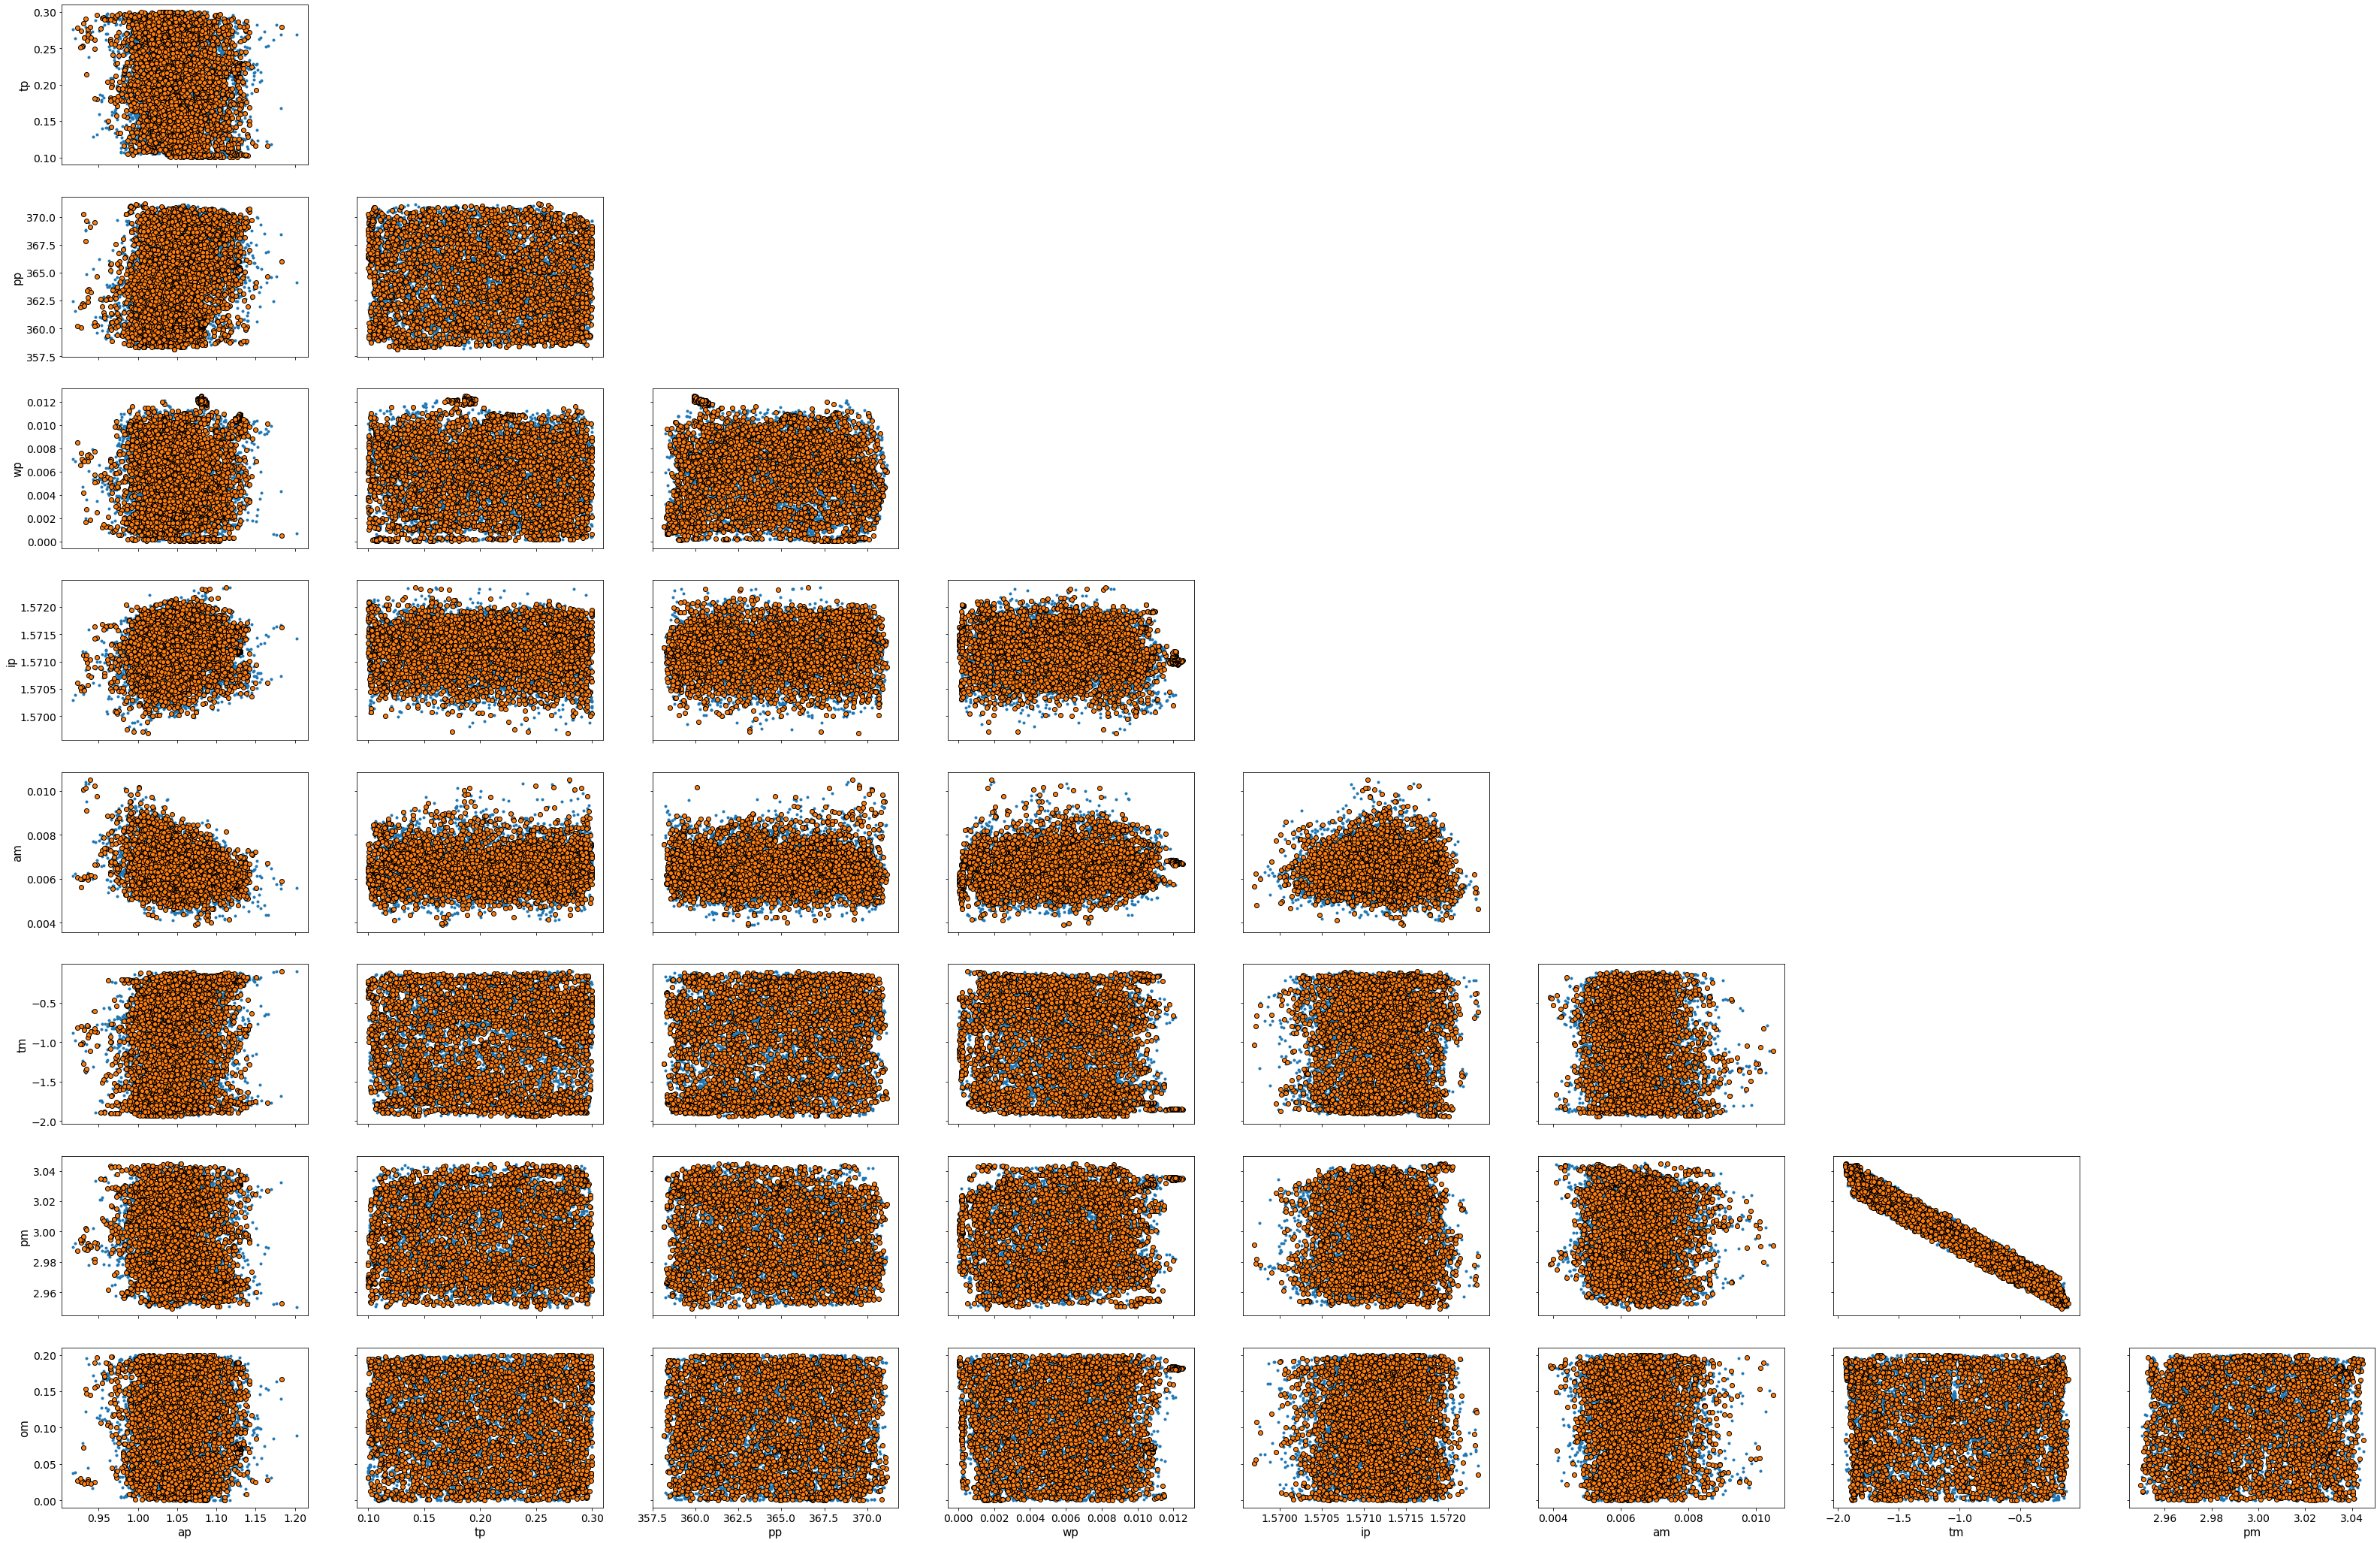

In [13]:
import arviz as az
az.plot_pair(trace, divergences=True);

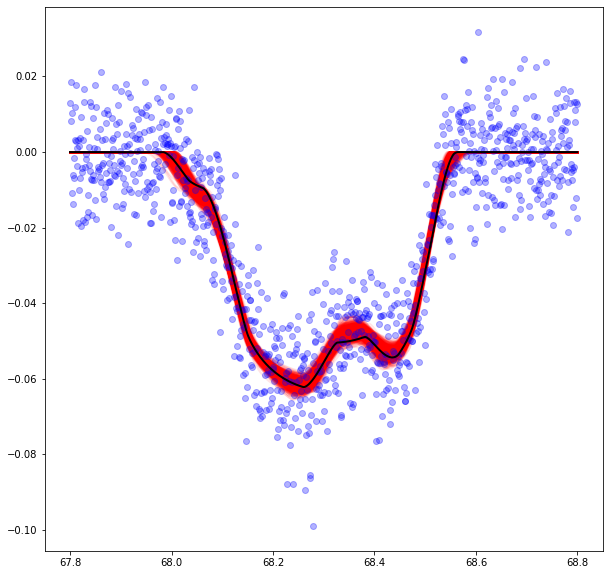

In [14]:
n = 1000
df = trace.to_dataframe()
inds = np.random.randint(10000, size=n)

plt.figure(figsize=(10, 10))
for i in inds:
    ap = df['posterior', 'ap'][i]
    tp = df['posterior', 'tp'][i]
    pp = df['posterior', 'pp'][i]
    wp = df['posterior', 'wp'][i]
    ip = df['posterior', 'ip'][i]
    am = df['posterior', 'am'][i]
    tm = df['posterior', 'tm'][i]
    pm = df['posterior', 'pm'][i]
    om = df['posterior', 'om'][i]
    wm = df['posterior', 'wm'][i]
    im = df['posterior', 'im'][i]
    mm = df['posterior', 'mm'][i]
    ep = df['posterior', 'ep'][i]
    em = df['posterior', 'em'][i]
    q1 = df['posterior', 'q1'][i]
    q2 = df['posterior', 'q2'][i]
    rp = df['posterior', 'rp'][i]
    rm = df['posterior', 'rm'][i]
    plt.plot(t, model.obs.eval(
        {
            model.ap:ap, 
            model.tp:tp, 
            model.pp:pp, 
            model.wp:wp, 
            model.ip:ip,
            model.am:am,
            model.tm:tm,
            model.pm:pm,
            model.om:om,
            model.wm:wm,
            model.im:im,
            model.mm:mm,
            model.ep:ep,
            model.em:em,
            model.q1:q1,
            model.q2:q2,
            model.rp:rp,
            model.rm:rm,
            model.lsigma:-100
        }
    ), 'r-', alpha=0.1, linewidth=2)
    
plt.plot(t, y, 'bo', alpha=0.3)
plt.plot(t, lctrue, 'k-', linewidth=2)
plt.savefig('/Users/tgordon/Desktop/pymc.pdf')

In [ ]:
inbounds = lambda x, l, u: 0.0 if ((x > l) & (x < u)) else -np.inf

def log_prior(args):
    
    lsigma, rp, rm, u1, u2, ap, tp, ep, pp, wp, ip, am, tm, em, pm, om, wm, im, mm = args
    
    prior = 0.0 if rm < rp and u1 + u2 < 1 and u1 > 0 and u1 + 2 * u2 > 0 else -np.inf
    
    return (prior 
            + inbounds(lsigma, np.log(0.001), np.log(0.1))
            + inbounds(rp, 0., 0.5)
            + inbounds(rm, 0.0, 0.5)
            + inbounds(ap, 0.5, 1.5)
            + inbounds(tp, 0.1, 0.3)
            + inbounds(ep, 0.0, 1.0)
            + inbounds(pp, 300, 400)
            + inbounds(wp, -0.0001, 0.5)
            + inbounds(ip, 85 * np.pi / 180, 90.1 * np.pi / 180)
            + inbounds(am, 0.0, 0.5)
            + inbounds(tm, -5.0, 0.0)
            + inbounds(em, 0.0, 1.0)
            + inbounds(pm, 0.0, 5.0)
            + inbounds(om, 0.0, 0.5)
            + inbounds(wm, 0.0, np.pi)
            + inbounds(im, 0.0, np.pi / 2)
            + inbounds(mm, 0.0, 1.0)
    )

def log_like(args, y):
    
    lsigma, rp, rm, u1, u2, ap, tp, ep, pp, wp, ip, am, tm, em, pm, om, wm, im, mm = args
    moon = system.moon(rm, am, tm, em, pm, om, wm, im, mm)
    planet = system.planet(rp, ap, tp, ep, pp, wp, ip)
    star = system.star(u1, u2)
    sys = system.system(star, planet, moon)
    sys.compute(t, grad=False)
    return sys.loglike(y, np.exp(lsigma))

def log_prob(args, y):
    lp = log_prior(args)
    ll = log_like(args, y)
    if np.isfinite(ll):
        return lp + ll
    else:
        return -np.inf

In [ ]:
import emcee

init_params = [np.log(0.01), rp, rm, 0.5, 0.3, ap, tp, ep, pp, wp, ip, am, tm, em, pm, om, wm, im, mm]
pos = init_params + 1e-4 * np.random.randn(50, len(init_params))
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_prob, args=(y,)
)
sampler.run_mcmc(pos, 5000, progress=True);

In [ ]:
import corner

flat_samples = sampler.get_chain(discard=2000, thin=15, flat=True)
fig = corner.corner(flat_samples, labels=['sigma', 'rp', 'rm', 'u1', 'u2', 'ap', 'tp', 'ep', 'pp', 'wp', 'ip', 'am', 'tm', 'em', 'pm', 'om', 'wm', 'im', 'mm']);

In [ ]:
n = 1000
inds = np.random.randint(len(flat_samples), size=n)
samps = flat_samples[inds]

def getlc(*args):
    _, rp, rm, u1, u2, ap, t0p, ep, Pp, wp, ip, am, t0m, em, Pm, Om, wm, im, mm = args
    moon = system.moon(rm, am, t0m, em, Pm, Om, wm, im, mm)
    planet = system.planet(rp, ap, t0p, ep, Pp, wp, ip)
    star = system.star(u1, u2)

    sys = system.system(star, planet, moon)
    sys.compute(t, grad=False)
    return sys.lightcurve()


plt.figure(figsize=(10, 10))
for i in range(n):
    lc = getlc(*samps[i])
    plt.plot(t, lc, color='r', linewidth=2, alpha=0.1)
    
plt.plot(t, y, 'bo', alpha=0.3)
plt.plot(t, lctrue, 'k-', linewidth=2)
plt.xlim(67.8, 68.8)
plt.savefig('/Users/tgordon/Desktop/emcee1.pdf')

In [ ]:
plt.figure(figsize=(10, 7))
plt.hist(flat_samples[:, 2], density=True, 
         histtype='step', linewidth=3, bins=20, color='r', label='emcee (no gradient)');
plt.hist(df['posterior', 'rm'], density=True, 
         histtype='step', linewidth=3, bins=20, color='b', label='pymc (gradient)');
plt.axvline(0.1, color='k', linewidth=3, linestyle='--', label='input rm')
plt.legend(loc='upper left')
plt.savefig('/Users/tgordon/Desktop/rm.pdf')

In [ ]:
plt.figure(figsize=(10, 7))
plt.hist(flat_samples[:, 1], density=True, 
         histtype='step', linewidth=3, bins=20, color='r', label='emcee (no gradient)');
plt.hist(df['posterior', 'rp'], density=True, 
         histtype='step', linewidth=3, bins=20, color='b', label='pymc (gradient)');
plt.axvline(0.2, color='k', linewidth=3, linestyle='--', label='input rp')
plt.legend(loc='upper left')
plt.savefig('/Users/tgordon/Desktop/rp.pdf')

In [ ]:
plt.figure(figsize=(10, 7))
plt.hist(flat_samples[:, 14], density=True, 
         histtype='step', linewidth=3, bins=20, color='r', label='emcee (no gradient)');
plt.hist(df['posterior', 'pm'], density=True, 
         histtype='step', linewidth=3, bins=20, color='b', label='pymc (gradient)');
plt.axvline(3.0, color='k', linewidth=3, linestyle='--', label='input pm')
plt.legend(loc='upper left')
plt.savefig('/Users/tgordon/Desktop/pm.pdf')